# **Portfolio Optimization using Monte Carlo Simulation**

This notebook implements portfolio optimization to identify an optimal investment portfolio
that maximizes returns while minimizing risk. It utilizes:
- **yfinance**: For fetching financial data
- **pandas** and **numpy**: For data manipulation and calculations
- **matplotlib**: For visualization


# **1. Importing Libraries**

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# **2. Fetching Stock Data**

In [2]:
ASSETS = ['AAPL', 'MSFT', 'AGG', 'GLD', 'AMD', 'NVDA', 'TGT']
START_DATE = '2020-01-01'
END_DATE = '2023-01-01'
MARKET_REPRESENTATION = 'SPY'
NUM_PORTFOLIOS = 100_000
RISK_FREE_RATE = 0

# **3. Downloading Stock Data**

In [3]:
data = yf.download(ASSETS, start=START_DATE, end=END_DATE)['Adj Close']

market_data = yf.download(MARKET_REPRESENTATION, start=START_DATE, end=END_DATE)['Adj Close']

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed


# **4. Calculations Involved**

In [4]:
# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Create a covariance matrix
cov_matrix = daily_returns.cov()

# Calculating Market Performance (SPY)
market_daily_returns = market_data.pct_change().dropna()
market_return = market_daily_returns.mean() * 252  # Annualized return
market_volatility = market_daily_returns.std() * np.sqrt(252)  # Annualized volatility
market_sharpe_ratio = (market_return - RISK_FREE_RATE) / market_volatility  # Sharpe ratio

# **5. Monte Carlo Simulation**

In [5]:
# Monte Carlo Simulation
results = np.zeros((4, NUM_PORTFOLIOS))
weights_record = np.zeros((len(ASSETS), NUM_PORTFOLIOS))

for i in range(NUM_PORTFOLIOS):
    # Random weights
    weights = np.random.random(len(ASSETS))
    weights /= np.sum(weights)
    weights_record[:, i] = weights

    # Annualized portfolio return
    portfolio_return = np.sum(weights * daily_returns.mean()) * 252

    # Annualized portfolio volatility
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

    # Sharpe ratio (assuming risk-free rate is 0 for simplicity)
    sharpe_ratio = (portfolio_return - RISK_FREE_RATE) / portfolio_stddev

    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = sharpe_ratio
    results[3, i] = i  # Index of the simulation

# **6. Highest Sharpe Ratio**

In [6]:
# Convert results to a DataFrame
columns = ['Return', 'Volatility', 'Sharpe Ratio', 'Simulation']
simulated_portfolios = pd.DataFrame(results.T, columns=columns)

# Find the portfolio with the highest Sharpe ratio
optimal_idx = simulated_portfolios['Sharpe Ratio'].idxmax()
optimal_portfolio = simulated_portfolios.loc[optimal_idx]
optimal_weights = weights_record[:, optimal_idx]


# **7. Visualization**

<ipython-input-7-ba7e5fad4188>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(optimal_portfolio[1], optimal_portfolio[0], color='green', marker='*', s=100)  # Mark the optimal portfolio


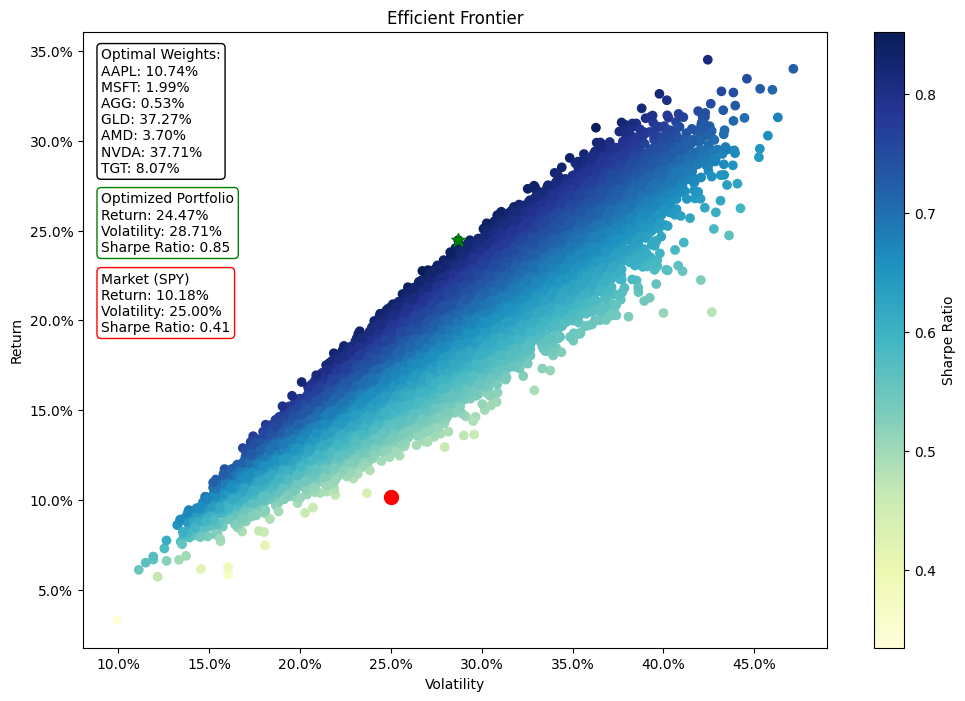

In [7]:

# Visualization
plt.figure(figsize=(12, 8))
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.1f}%'.format(x * 100)))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1f}%'.format(y * 100)))
plt.scatter(simulated_portfolios['Volatility'], simulated_portfolios['Return'], c=simulated_portfolios['Sharpe Ratio'], cmap='YlGnBu')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.scatter(market_volatility, market_return, color='red', marker='o', s=100)  # Mark the market (SPY) performance
plt.scatter(optimal_portfolio[1], optimal_portfolio[0], color='green', marker='*', s=100)  # Mark the optimal portfolio

# Displaying the weights of each item in the optimal portfolio
weight_text = "Optimal Weights:\n" + '\n'.join([f"{asset}: {weight*100:.2f}%" for asset, weight in zip(ASSETS, optimal_weights)])
plt.gcf().text(0.14, 0.86, weight_text, fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'), ha='left')

# Displaying Optimized Portfolio Performance
optimal_text = f"Optimized Portfolio\nReturn: {optimal_portfolio['Return'] * 100:.2f}%\nVolatility: {optimal_portfolio['Volatility'] * 100:.2f}%\nSharpe Ratio: {optimal_portfolio['Sharpe Ratio']:.2f}"
plt.gcf().text(0.14, (0.86 - 0.02 - (len(ASSETS) + 1) * 0.02), optimal_text, fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='green', facecolor='white'), ha='left')

# Displaying Market (SPY) Performance
market_text = f"Market ({MARKET_REPRESENTATION})\nReturn: {market_return * 100:.2f}%\nVolatility: {market_volatility * 100:.2f}%\nSharpe Ratio: {market_sharpe_ratio:.2f}"
plt.gcf().text(0.14, (0.86 - 0.12 - (len(ASSETS) + 1) * 0.02), market_text, fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white'), ha='left')

# Display Full Chart
plt.show()


# **Conclusion:**
The code successfully generated an efficient frontier of potential investment portfolios based on a Monte Carlo simulation.

The optimal portfolio identified maximizes the Sharpe ratio, indicating a balance between high return and low risk.

The visualization clearly shows the relationship between portfolio return and volatility, with the optimal portfolio marked for easy identification.

The optimal portfolio weights provide insights into the allocation strategy.

The comparison with the market's (SPY) performance highlights the potential benefits of portfolio optimization.

This approach can help investors make informed decisions about asset allocation to achieve their investment goals.